In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
df=pd.read_csv('Economic Times 2019.csv')
df.head(20)

,Rank,Company Name,Revenue Cr,Revenue %CHG,PAT Cr,PAT %CHG,MCAP
0,1,Reliance Industries Ltd.,575873.00,43.36,39588.00,9.74,949280.41
1,2,Indian Oil Corporation Ltd.,532247.59,24.99,17376.70,-21.69,125768.47
2,3,Oil And Natural Gas Corporation Ltd.,432962.31,29.97,30494.96,37.95,172135.97
3,4,State Bank of India,330687.36,7.88,2299.64,LP,290140.98
4,5,Tata Motors Ltd.,305280.69,2.06,-28826.23,PL,48588.33
5,6,Bharat Petroleum Corporation Ltd.,301200.45,26.10,7802.30,-13.39,111550.97
6,7,Hindustan Petroleum Corporation Ltd.,277816.42,24.94,6690.63,-7.31,45237.26
7,8,Rajesh Exports Ltd.,175830.66,-6.35,1292.13,2.08,20200.00
8,9,Tata Steel Ltd.,159738.75,15.42,10218.33,-23.94,45758.52
9,10,Coal India Ltd.,153127.54,14.04,17461.85,148.09,126223.50


In [19]:
df.rename(columns={'Company Name':'Company_Name','Revenue Cr':'Revenue_Cr','Revenue %CHG':'Revenue_Change_%','PAT Cr':'Profit_After_Tax_in_cr','PAT %CHG':'Profit_After_Tax_Change_%','MCAP':'Market_Capitalization'},inplace=True)
df.head(10)

,Rank,Company_Name,Revenue_Cr,Revenue_Change_%,Profit_After_Tax_in_cr,Profit_After_Tax_Change_%,Market_Capitalization
0,1,Reliance Industries Ltd.,575873.00,43.36,39588.00,9.74,949280.41
1,2,Indian Oil Corporation Ltd.,532247.59,24.99,17376.70,-21.69,125768.47
2,3,Oil And Natural Gas Corporation Ltd.,432962.31,29.97,30494.96,37.95,172135.97
3,4,State Bank of India,330687.36,7.88,2299.64,LP,290140.98
4,5,Tata Motors Ltd.,305280.69,2.06,-28826.23,PL,48588.33
5,6,Bharat Petroleum Corporation Ltd.,301200.45,26.10,7802.30,-13.39,111550.97
6,7,Hindustan Petroleum Corporation Ltd.,277816.42,24.94,6690.63,-7.31,45237.26
7,8,Rajesh Exports Ltd.,175830.66,-6.35,1292.13,2.08,20200.00
8,9,Tata Steel Ltd.,159738.75,15.42,10218.33,-23.94,45758.52
9,10,Coal India Ltd.,153127.54,14.04,17461.85,148.09,126223.50


In [20]:
top_10_revenue=df.groupby("Company_Name").Revenue_Cr.sum().nlargest(10)

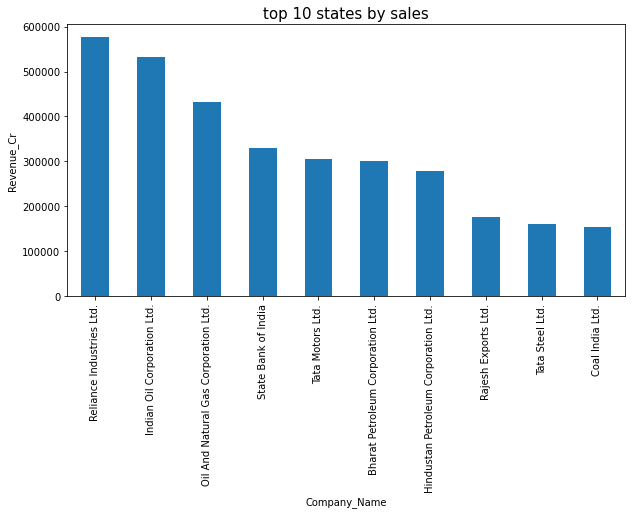

In [21]:
top_10_revenue.plot(kind='bar',figsize=(10,5),fontsize=10)
plt.xlabel("Company_Name",fontsize=10)
plt.ylabel("Revenue_Cr",fontsize=10)
plt.title("top 10 states by sales",fontsize=15)
plt.show()

In [22]:
top_10_profitaftertax=df.groupby("Company_Name").Profit_After_Tax_in_cr.sum().nlargest(10)

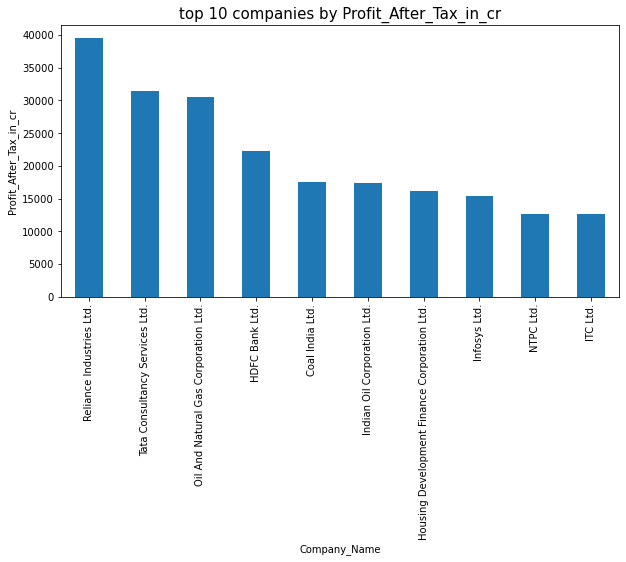

In [23]:
top_10_profitaftertax.plot(kind='bar',figsize=(10,5),fontsize=10)
plt.xlabel("Company_Name",fontsize=10)
plt.ylabel("Profit_After_Tax_in_cr",fontsize=10)
plt.title("top 10 companies by Profit_After_Tax_in_cr",fontsize=15)
plt.show()

In [24]:
top_10_marketcapitalization=df.groupby("Company_Name").Market_Capitalization.sum().nlargest(10)

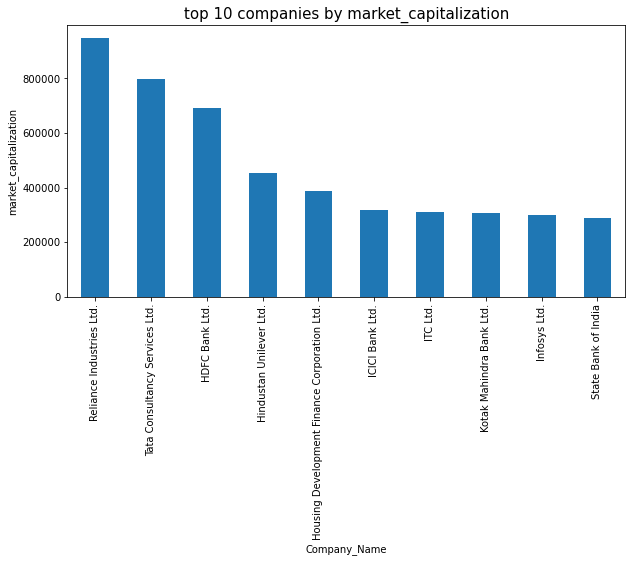

In [25]:
top_10_marketcapitalization.plot(kind='bar',figsize=(10,5),fontsize=10)
plt.xlabel("Company_Name",fontsize=10)
plt.ylabel("market_capitalization",fontsize=10)
plt.title("top 10 companies by market_capitalization",fontsize=15)
plt.show()

In [26]:
revenue_vs_profit=df.groupby('Revenue_Cr')['Profit_After_Tax_in_cr'].mean()
revenue_vs_profit

Revenue_Cr
2159.85         66.44
2161.76        181.89
2164.68         98.11
2168.17        220.66
2170.54        133.74
               ...   
305280.69   -28826.23
330687.36     2299.64
432962.31    30494.96
532247.59    17376.70
575873.00    39588.00
Name: Profit_After_Tax_in_cr, Length: 499, dtype: float64

Text(0, 0.5, 'Profit_After_Tax_in_cr')

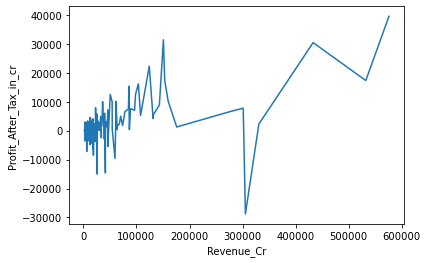

In [27]:
revenue_vs_profit.plot()
plt.ylabel('Profit_After_Tax_in_cr')

In [32]:
top_20=df.head(20)
tail_20=df.tail(20)

<function matplotlib.pyplot.show(*args, **kw)>

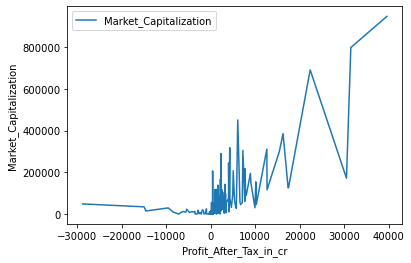

In [29]:
sns.lineplot(x='Profit_After_Tax_in_cr',y='Market_Capitalization',label='Market_Capitalization',data=df)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

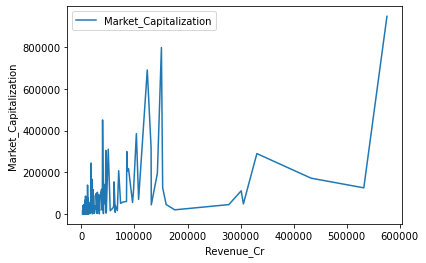

In [30]:
sns.lineplot(x='Revenue_Cr',y='Market_Capitalization',label='Market_Capitalization',data=df)
plt.legend()
plt.show

<ipython-input-31-31700c3075a7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_20.groupby('Company_Name')['Revenue_Cr','Profit_After_Tax_in_cr'].agg(['sum']).plot.bar()


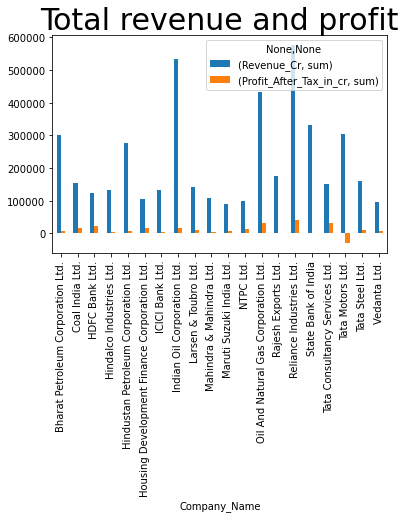

In [31]:
top_20.groupby('Company_Name')['Revenue_Cr','Profit_After_Tax_in_cr'].agg(['sum']).plot.bar()
plt.title('Total revenue and profit',fontsize=30)
plt.show()

<ipython-input-34-98c87f93ad5b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tail_20.groupby('Company_Name')['Revenue_Cr','Profit_After_Tax_in_cr'].agg(['sum']).plot.bar()


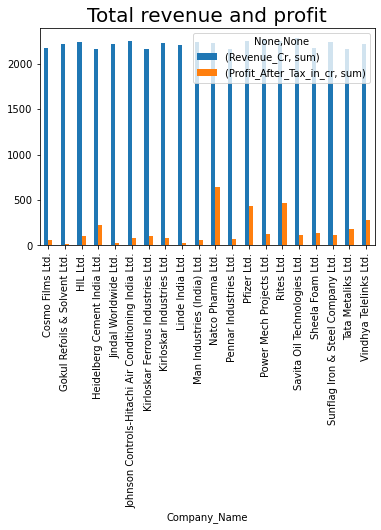

In [34]:
tail_20.groupby('Company_Name')['Revenue_Cr','Profit_After_Tax_in_cr'].agg(['sum']).plot.bar()
plt.title('Total revenue and profit',fontsize=20)
plt.show()

<ipython-input-37-66fc7934745d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_20.groupby('Company_Name')['Revenue_Cr','Market_Capitalization'].agg(['sum']).plot.bar()


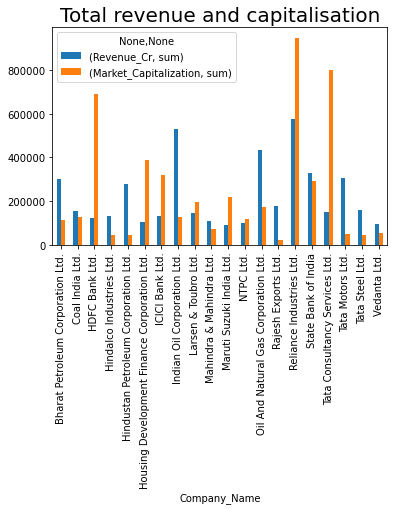

In [37]:
top_20.groupby('Company_Name')['Revenue_Cr','Market_Capitalization'].agg(['sum']).plot.bar()
plt.title('Total revenue and capitalisation',fontsize=20)
plt.show()

<ipython-input-56-3eb9767fa8a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tail_20.groupby('Company_Name')['Revenue_Cr','Market_Capitalization'].agg(['sum']).plot.bar()


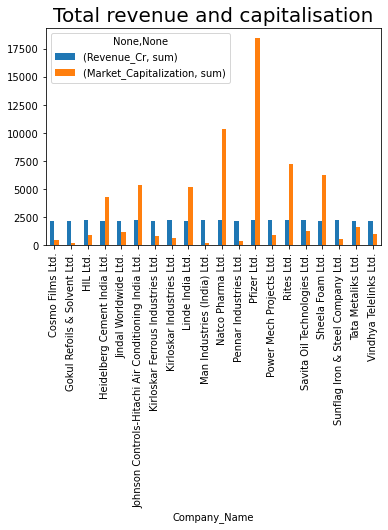

In [56]:
tail_20.groupby('Company_Name')['Revenue_Cr','Market_Capitalization'].agg(['sum']).plot.bar()
plt.title('Total revenue and capitalisation',fontsize=20)
plt.show()

<ipython-input-40-6e367b136e90>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_20.groupby('Company_Name')['Profit_After_Tax_in_cr','Market_Capitalization'].agg(['sum']).plot.bar()


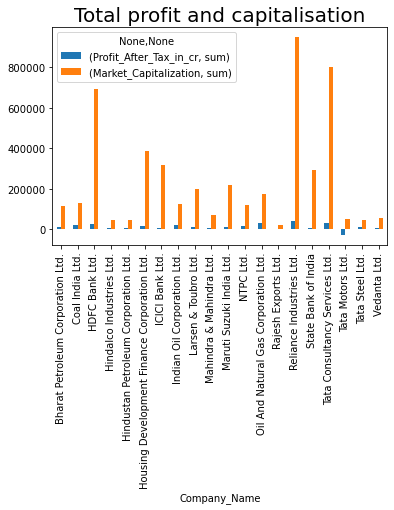

In [40]:
top_20.groupby('Company_Name')['Profit_After_Tax_in_cr','Market_Capitalization'].agg(['sum']).plot.bar()
plt.title('Total profit and capitalisation',fontsize=20)
plt.show()

In [ ]:
revenueandprofit=df.groupby()

In [52]:
sales_and_profit=df.groupby('Rank').sum().iloc[:,[0,2]].sum()
round(sales_and_profit,2)

Revenue_Cr                9623331.95
Profit_After_Tax_in_cr     472286.40
dtype: float64

In [62]:
km=KMeans(n_clusters=5)
predicted=km.fit_predict(top_20[['Rank','Revenue_Cr']])
predicted

array([3, 3, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4])

In [64]:
top_20['cluster']=predicted
top_20.head()

<ipython-input-64-07fccb1ccfa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster']=predicted


,Rank,Company_Name,Revenue_Cr,Revenue_Change_%,Profit_After_Tax_in_cr,Profit_After_Tax_Change_%,Market_Capitalization,cluster
0,1,Reliance Industries Ltd.,575873.00,43.36,39588.00,9.74,949280.41,3
1,2,Indian Oil Corporation Ltd.,532247.59,24.99,17376.70,-21.69,125768.47,3
2,3,Oil And Natural Gas Corporation Ltd.,432962.31,29.97,30494.96,37.95,172135.97,0
3,4,State Bank of India,330687.36,7.88,2299.64,LP,290140.98,2
4,5,Tata Motors Ltd.,305280.69,2.06,-28826.23,PL,48588.33,2


No handles with labels found to put in legend.


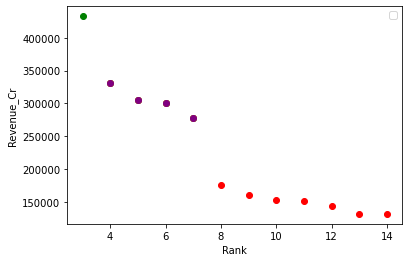

In [73]:
df1=top_20[top_20.cluster==0]
df2=top_20[top_20.cluster==1]
df3=top_20[top_20.cluster==2]
df4=top_20[top_20.cluster==3]
df5=top_20[top_20.cluster==4]

plt.scatter(df1.Rank,df1['Revenue_Cr'],color='green')
plt.scatter(df2.Rank,df2['Revenue_Cr'],color='red')
plt.scatter(df3.Rank,df3['Revenue_Cr'],color='black')
plt.scatter(df3.Rank,df3['Revenue_Cr'],color='orange')
plt.scatter(df3.Rank,df3['Revenue_Cr'],color='purple')

plt.xlabel('Rank')
plt.ylabel('Revenue_Cr')
plt.legend()

In [75]:
km=KMeans(n_clusters=5)
predict=km.fit_predict(top_20[['Rank','Revenue_Cr']])
predict

array([0, 0, 3, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1])

In [76]:
tail_20['cluster']=predict
tail_20.head()

<ipython-input-76-e6f0e66cbc19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_20['cluster']=predict


,Rank,Company_Name,Revenue_Cr,Revenue_Change_%,Profit_After_Tax_in_cr,Profit_After_Tax_Change_%,Market_Capitalization,cluster
480,481,Savita Oil Technologies Ltd.,2280.92,27.27,114.27,-9.45,1285.98,0
481,482,Power Mech Projects Ltd.,2276.95,46.47,121.62,53.10,968.70,0
482,483,Johnson Controls-Hitachi Air Conditioning Indi...,2256.72,2.92,85.94,-14.19,5377.12,3
483,484,Pfizer Ltd.,2248.89,7.97,429.05,19.16,18471.34,2
484,485,Rites Ltd.,2247.85,36.15,469.51,37.09,7254.63,2


No handles with labels found to put in legend.


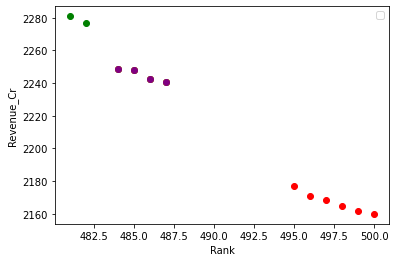

In [77]:
df1=tail_20[tail_20.cluster==0]
df2=tail_20[tail_20.cluster==1]
df3=tail_20[tail_20.cluster==2]
df4=tail_20[tail_20.cluster==3]
df5=tail_20[tail_20.cluster==4]

plt.scatter(df1.Rank,df1['Revenue_Cr'],color='green')
plt.scatter(df2.Rank,df2['Revenue_Cr'],color='red')
plt.scatter(df3.Rank,df3['Revenue_Cr'],color='black')
plt.scatter(df3.Rank,df3['Revenue_Cr'],color='orange')
plt.scatter(df3.Rank,df3['Revenue_Cr'],color='purple')

plt.xlabel('Rank')
plt.ylabel('Revenue_Cr')
plt.legend()